In [2]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv("sakila_consulta.csv")
df.head()

,rental_id,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
0,1,2005-05-24 22:53:30.000,2005-05-26 22:04:30.000,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
1,2,2005-05-24 22:54:33.000,2005-05-28 19:40:33.000,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
2,3,2005-05-24 23:03:39.000,2005-06-01 22:12:39.000,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
3,4,2005-05-24 23:04:41.000,2005-06-03 01:43:41.000,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
4,5,2005-05-24 23:05:21.000,2005-06-02 04:33:21.000,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


In [4]:
# Promedio de duracion de una pelicula rentada
df['film_rental_duration'].mean()

4.935489902767389

<Axes: >

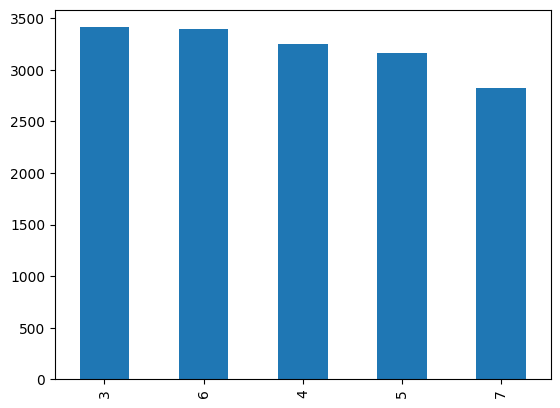

In [7]:

df['film_rental_duration'].value_counts().plot(kind='bar')

<Axes: ylabel='film_rental_rate'>

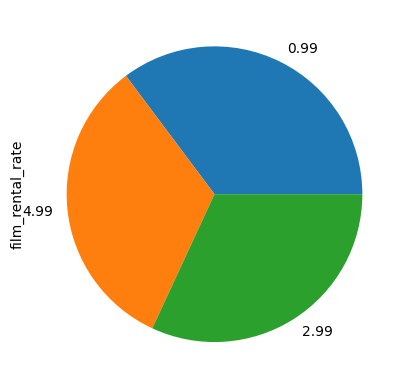

In [12]:
film_rate = df['film_rental_rate'].value_counts()
film_rate.plot(kind='pie')


<Axes: >

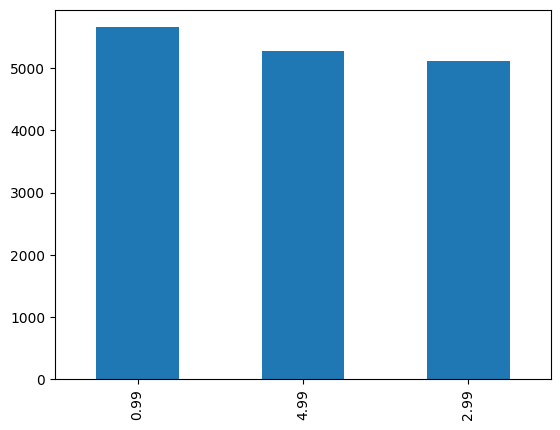

In [13]:
film_rate.plot(kind='bar')

<Axes: >

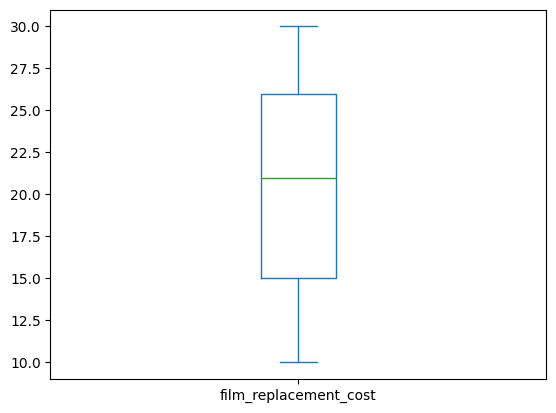

In [23]:
df['film_replacement_cost'].plot(kind='box')


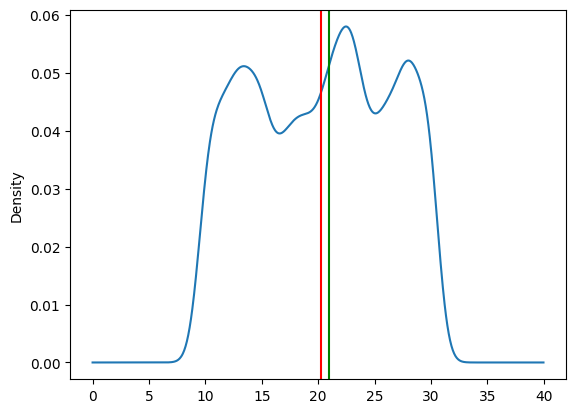

In [20]:
ax =df['film_replacement_cost'].plot(kind='density')
ax.axvline(df['film_replacement_cost'].mean(),color='red')
ax.axvline(df['film_replacement_cost'].median(),color='green')

PG-13    3585
NC-17    3293
PG       3212
R        3181
G        2773
Name: film_rating, dtype: int64


<Axes: >

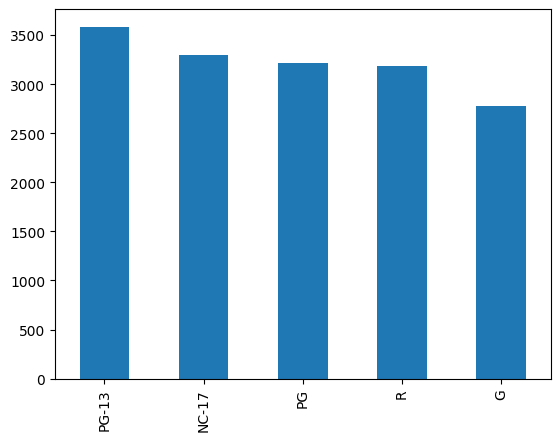

In [25]:
print(df['film_rating'].value_counts())
df['film_rating'].value_counts().plot(kind='bar')

<Axes: title={'center': 'film_replacement_cost'}, xlabel='[film_rating]'>

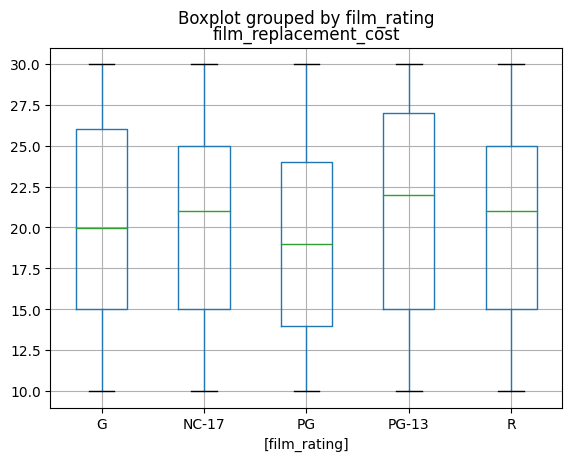

In [26]:
df[['film_replacement_cost','film_rating']].boxplot(by='film_rating')

In [47]:
# Divir una columna por separadores
df[['rental_date','time']] = df['rental_date'].str.split(' ',expand=True)
df[['return_date','time2']] = df['return_date'].str.split(' ',expand=True)

In [ ]:
df.drop(['time','time2'],axis=1)

In [ ]:
df['rental_date'] = df['rental_date'].astype('datetime64[ns]')
df['return_date'] = df['return_date'].astype('datetime64[ns]')
df.info()

In [69]:
df['rental_days']=df[['rental_date','return_date']].apply(lambda x:(x[1]-x[0]).days,axis=1)
df.head()

,rental_id,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days
0,1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,1.0
1,2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R,3.0
2,3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G,7.0
3,4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R,9.0
4,5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,8.0


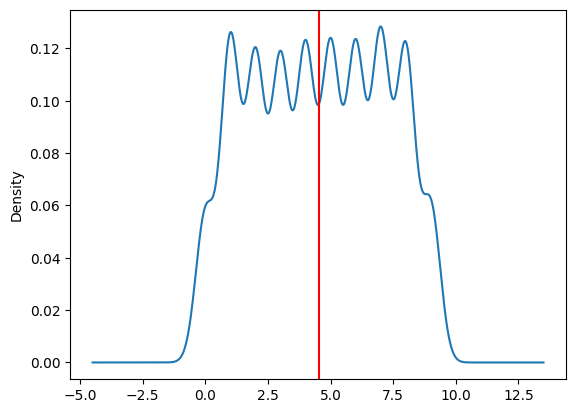

In [71]:
ax = df['rental_days'].plot(kind='density')
ax.axvline(df['rental_days'].mean(),color='red')

In [73]:
df['film_daily_rental_rate'] = df['film_rental_rate'] / df['film_rental_duration']
df.head(1)

,rental_id,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
0,1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,1.0,0.427143


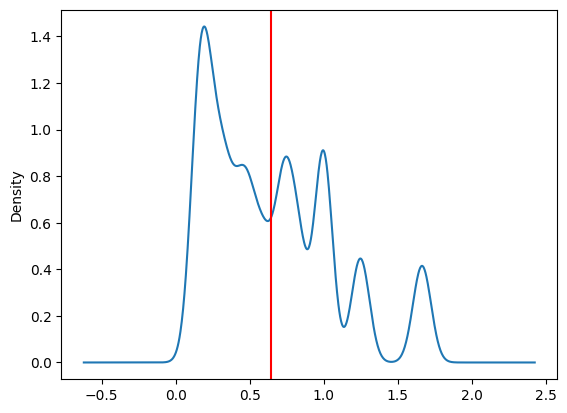

In [74]:
ax = df['film_daily_rental_rate'].plot(kind='density')
ax.axvline(df['film_daily_rental_rate'].mean(),color='red')


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   rental_id               16044 non-null  int64         
 1   rental_date             16044 non-null  datetime64[ns]
 2   return_date             15861 non-null  datetime64[ns]
 3   customer_lastname       16044 non-null  object        
 4   store_id                16044 non-null  int64         
 5   rental_store_city       16044 non-null  object        
 6   film_title              16044 non-null  object        
 7   film_rental_duration    16044 non-null  int64         
 8   film_rental_rate        16044 non-null  float64       
 9   film_replacement_cost   16044 non-null  float64       
 10  film_rating             16044 non-null  object        
 11  rental_days             15861 non-null  float64       
 12  film_daily_rental_rate  16044 non-null  float6

In [80]:
df.loc[df['film_daily_rental_rate'] == df['film_daily_rental_rate'].max()].head(10)

,rental_id,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
12,13,2005-05-25 00:22:55,2005-05-30 04:28:55,MCWHORTER,1,Lethbridge,KING EVOLUTION,3,4.99,24.99,NC-17,5.0,1.663333
39,40,2005-05-25 05:09:04,2005-05-27 23:12:04,YEE,1,Lethbridge,MINDS TRUMAN,3,4.99,22.99,PG-13,2.0,1.663333
67,68,2005-05-25 09:47:31,2005-05-31 10:20:31,ORTIZ,2,Woodridge,TEEN APOLLO,3,4.99,25.99,G,6.0,1.663333
105,106,2005-05-25 18:18:19,2005-06-04 00:01:19,AUSTIN,2,Woodridge,SHOW LORD,3,4.99,24.99,PG-13,9.0,1.663333
115,116,2005-05-25 19:27:51,2005-05-26 16:23:51,GARCIA,1,Lethbridge,WIFE TURN,3,4.99,27.99,NC-17,0.0,1.663333
123,124,2005-05-25 20:46:11,2005-05-30 00:47:11,MENDOZA,1,Lethbridge,BACKLASH UNDEFEATED,3,4.99,24.99,PG-13,4.0,1.663333
134,135,2005-05-25 21:58:58,2005-06-03 17:50:58,ROYAL,1,Lethbridge,AMERICAN CIRCUS,3,4.99,17.99,R,8.0,1.663333
151,152,2005-05-26 00:41:10,2005-06-03 06:05:10,MORGAN,1,Lethbridge,MIDSUMMER GROUNDHOG,3,4.99,27.99,G,8.0,1.663333
154,155,2005-05-26 01:15:05,2005-06-01 00:03:05,BARBEE,2,Woodridge,BEHAVIOR RUNAWAY,3,4.99,20.99,PG,5.0,1.663333
162,163,2005-05-26 02:26:23,2005-06-04 06:36:23,GRAHAM,1,Lethbridge,KISSING DOLLS,3,4.99,9.99,R,9.0,1.663333


In [85]:
df.loc[df['rental_store_city'] == 'Lethbridge'].shape[0]

7923

<Axes: >

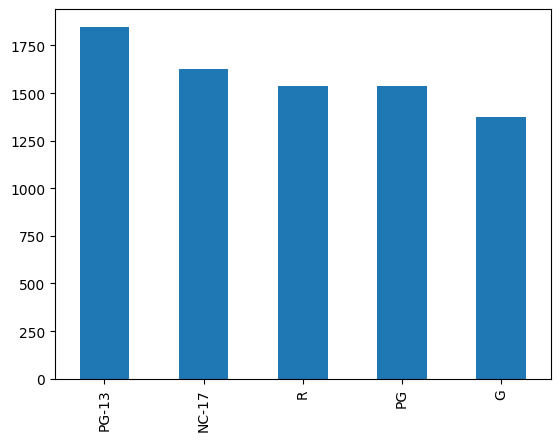

In [89]:
df.loc[df['rental_store_city'] == 'Lethbridge','film_rating'].value_counts()
df.loc[df['rental_store_city'] == 'Lethbridge','film_rating'].value_counts().plot(kind='bar')

In [90]:
df.loc[(df['rental_store_city'] == 'Woodridge') & (df['film_rental_duration'] > 5)].shape[0]

3186

In [92]:
df.loc[(df['store_id']== 2) | (df['film_replacement_cost'] < 10.99)].shape[0]

8444

In [1]:
import numpy as np
a = np.arange(5)
a + 20

array([20, 21, 22, 23, 24])